<a href="https://colab.research.google.com/github/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/blob/main/Modulo_04_Estadistica/EjercicioN37.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

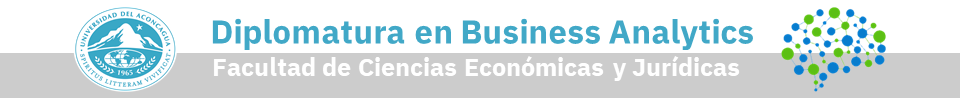


<center/>

<center>
<font color="#41a8c7">
<h2><b>
Estadística inferencial - Modelo Factores - Anova
</font>
</center>

**Ejercicio Nº37**   El dueño de una fábrica de bicicletas en Mendoza, desea estudiar el precio de mercado de este producto, para poder determinar si su política de precios es acorde al mercado. Para  ello segmenta el mercado en tres tipos de producto y toma una muestra de distintos oferentes. Usando el modelo de factores, determine si para cada categoría hay diferencias de precios. ¿Si lo hay cuanta es la diferencia? Recuerde usar las pruebas t y F, y analizar los supuestos del modelo.Los precios están en dólares

Instalar Librería

In [ ]:
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




Cargar librería

In [ ]:
library(ggplot2)
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Cargar datos

In [ ]:
tipo=c("Road","Road","Road","Road","Road","Road","Road","Road",
            "Fitness","Fitness","Fitness","Fitness","Fitness",
            "Comfort","Comfort","Comfort","Comfort","Comfort","Comfort")



In [ ]:
Precios=c(1800,1800,1000,1300,1320,1050,1350,
          650,630,700,700,830,700,340,280,360,
          600,350,330)
                


Transformar a factor

In [ ]:
tipo=as.factor(tipo)

Crear data frame

In [ ]:
datos=data.frame(Precios=Precios,tipo=tipo)
datos

Precios,tipo
<dbl>,<fct>
1800,Road
1800,Road
1000,Road
1300,Road
1320,Road
1050,Road
1350,Road
650,Road
630,Fitness


Construir el gráfico de caja y bigotes

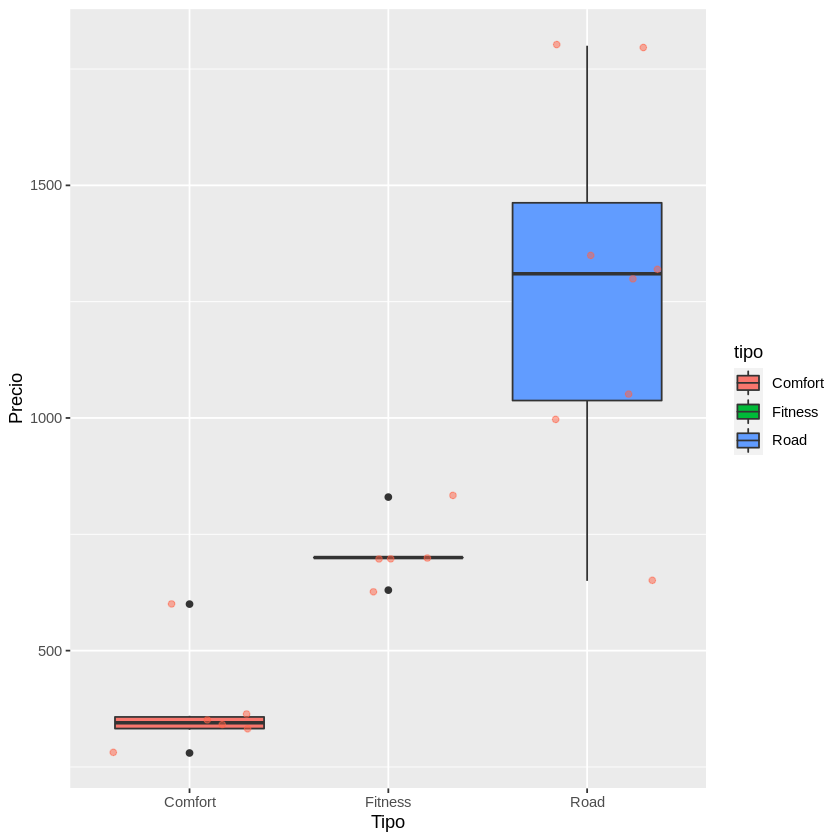

In [ ]:
g = ggplot(datos, aes(y=Precios,x=tipo))
g= g + geom_boxplot(aes(fill=tipo)) 
g=g+geom_jitter(alpha = 0.5, color = "tomato")
g=g+ylab("Precio")
g=g+xlab("Tipo")
g


Estimar el modelo

In [ ]:
options(contrasts = c("contr.sum","contr.poly"))

modelo=lm(Precios~tipo)


summary(modelo)


Call:
lm(formula = Precios ~ tipo)

Residuals:
    Min      1Q  Median      3Q     Max 
-633.75  -64.33  -12.00   51.25  516.25 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   790.81      62.95  12.562 1.06e-09 ***
tipo1        -414.14      89.40  -4.632 0.000277 ***
tipo2         -78.81      93.80  -0.840 0.413209    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 269.3 on 16 degrees of freedom
Multiple R-squared:  0.7173,	Adjusted R-squared:  0.6819 
F-statistic:  20.3 on 2 and 16 DF,  p-value: 4.083e-05


Tanto la prueba t y F indican que existe diferencias de medias de precios entre los distintos modelo de bicicletas. La media general estimada es 790 dólares, para todas los modelos. 

Cuando se trata del estilo Confort, la media de precios estimada disminuye en 414 dólares. Para el tipo Fitness no hay diferencia con respecto a la media general, ya que el el valor t correspondiente es mayor a 0,05.

Por último para la clase Road la diferencia de precio con la media general estimada es  de 492 (414.14+78,81). 

El F valor indica que el modelo ajusta y hay evidencia de direrencias de medias.

Controlar supuesto modelo

Test de shapiro-Wilks

H0: Es normal vs H1: no es normal


In [ ]:
shapiro.test(rstandard(modelo))


	Shapiro-Wilk normality test

data:  rstandard(modelo)
W = 0.88805, p-value = 0.02973


Test de bartlett

H0: todas las varianzas son iguales vs H1: al menos una diferente


In [ ]:
bartlett.test(rstandard(modelo)~tipo-1)


	Bartlett test of homogeneity of variances

data:  rstandard(modelo) by tipo
Bartlett's K-squared = 12.308, df = 2, p-value = 0.002125


Durbin-Watson

H0: errores son independientes vs H1: no son independientes


In [ ]:
dwtest(modelo)


	Durbin-Watson test

data:  modelo
DW = 1.6005, p-value = 0.07988
alternative hypothesis: true autocorrelation is greater than 0
